In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
data = pd.read_csv("customer_churn.csv")

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
pd.set_option("display.max_columns",30)

In [13]:
data.drop(axis=1,labels = ["customerID"],inplace=True)

In [14]:

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
data = data[data["TotalCharges"] != " "]

In [83]:
data["TotalCharges"] =data["TotalCharges"].astype("float")

In [85]:
categorical = [col for col in data.columns if data[col].dtypes == "O"]

In [86]:
categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [87]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [89]:
data["gender"] = data["gender"].map({
    'Female' : 0,
    "Male" : 1
})

In [90]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
dictionary = {
    "Yes" : 1,
    "No" : 0
}

In [116]:
data["StreamingMovies"] = data["StreamingMovies"].str.replace("No internet service","No")

In [119]:
data["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [120]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [125]:
columns_yes_no = [
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "PaperlessBilling",
    "Churn"
]

In [126]:
data[columns_yes_no]

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,Yes,No,No,No,No,Yes,No,No,No,No,Yes,No
1,No,No,Yes,No,Yes,No,Yes,No,No,No,No,No
2,No,No,Yes,No,Yes,Yes,No,No,No,No,Yes,Yes
3,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No
4,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No
7040,Yes,Yes,No,No,Yes,No,No,No,No,No,Yes,No
7041,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,Yes


In [127]:
for col in columns_yes_no:
    data[col] = data[col].map(dictionary)

In [128]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [132]:
data = pd.get_dummies(data,columns=["InternetService","Contract","PaymentMethod"],drop_first=True)

In [133]:
data.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

In [141]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,0,1,0


In [142]:
data.shape

(7032, 24)

In [163]:
x = data.drop(axis=1,labels = "Churn")

In [164]:
y = data["Churn"]

In [165]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [166]:
print(y_test.shape)

(1402,)


In [154]:
data.isnull().sum().sum()

0

In [156]:
data.duplicated().sum()

22

In [161]:
data.drop_duplicates(keep="first",inplace=True)

In [162]:
data.shape

(7010, 24)

In [168]:
!pip install tensorflow

     |████████████████████████████████| 511.7 MB 8.0 kB/s eta 0:00:013     |█████████████████▍              | 277.4 MB 9.6 MB/s eta 0:00:25     |███████████████████▊            | 316.0 MB 8.9 MB/s eta 0:00:23     |████████████████████            | 321.0 MB 10.4 MB/s eta 0:00:19     |█████████████████████████       | 399.1 MB 8.9 MB/s eta 0:00:13     |███████████████████████████▋    | 441.3 MB 8.3 MB/s eta 0:00:09
     |████████████████████████████████| 5.8 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.5 MB/s  eta 0:00:01
     |████████████████████████████████| 57 kB 2.4 MB/s eta 0:00:011
     |████████████████████████████████| 123 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 3.3 MB/s eta 0:00:011
     |████████████████████████████████| 438 kB 5.7 MB/s eta 0:00:01
     |████████████████████████████████

In [169]:
import tensorflow

2022-08-01 17:07:42.170826: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-01 17:07:42.170855: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [170]:
from tensorflow import keras

In [186]:
model = keras.Sequential([
    keras.layers.Dense(23,activation="relu",input_shape=(23,)),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [187]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [188]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 7.0692 - accuracy: 0.6555
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.9276 - accuracy: 0.6805
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.7006 - accuracy: 0.7134
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5879 - accuracy: 0.7438
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5717 - accuracy: 0.7407
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5647 - accuracy: 0.7459
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5640 - accuracy: 0.7420
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 0.7509
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5527 - accuracy: 0.7529
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5389 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.7841
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4858 - accuracy: 0.7864
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4952 - accuracy: 0.7778
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4914 - accuracy: 0.7771
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.7839
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7821
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.7867
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 0.7905
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7887
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 

In [189]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 959us/step - loss: 0.4943 - accuracy: 0.7418


[0.49428611993789673, 0.7417974472045898]

In [199]:
y_pred = model.predict(x_train)

176/176 [==============================] - 0s 774us/step


In [200]:
y_p = []
for element in y_pred:
    if element > 0.5:
        y_p.append(1)
    else:
        y_p.append(0)

In [201]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_train,y_p))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      4123
           1       0.79      0.03      0.06      1485

    accuracy                           0.74      5608
   macro avg       0.76      0.51      0.46      5608
weighted avg       0.75      0.74      0.64      5608



Text(69.0, 0.5, 'Truth')

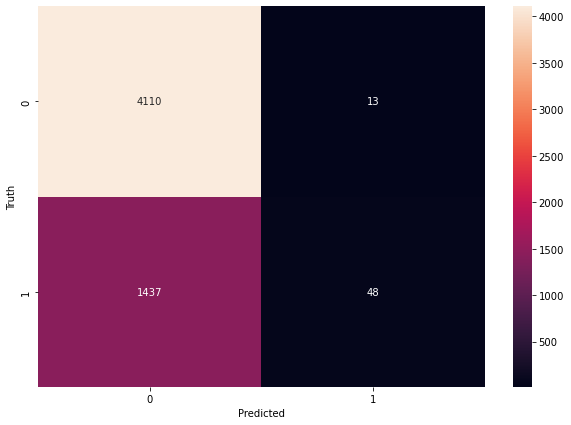

In [202]:
import seaborn as sn
cm = tensorflow.math.confusion_matrix(labels=y_train,predictions=y_p)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [210]:
y_train.value_counts()

0    4123
1    1485
Name: Churn, dtype: int64